In [8]:
import keras.losses
from keras.preprocessing.image import ImageDataGenerator
import os



base_dir = os.getcwd()
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir,'test')
val_dir = os.path.join(base_dir,'val')

train_datagen = ImageDataGenerator(rescale=1./255)

#train_datagen = ImageDataGenerator(rotation_range=40, rescale=1./255,width_shift_range=0.2,height_shift_range=0.2, shear_range=0.2, horizontal_flip=False, fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)



train_generator = train_datagen.flow_from_directory(train_dir,target_size=(100,100),batch_size=20, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir,target_size=(100,100),batch_size=20, class_mode='categorical')



test_generator = test_datagen.flow_from_directory(test_dir,target_size=(100,100),batch_size=20, class_mode='categorical', shuffle=False)



Found 1929 images belonging to 10 classes.
Found 548 images belonging to 10 classes.
Found 287 images belonging to 10 classes.


data batch shape (20, 100, 100, 3)
label batch shape (20, 10)
sample data shape (100, 100, 3)
sample 20 labels [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


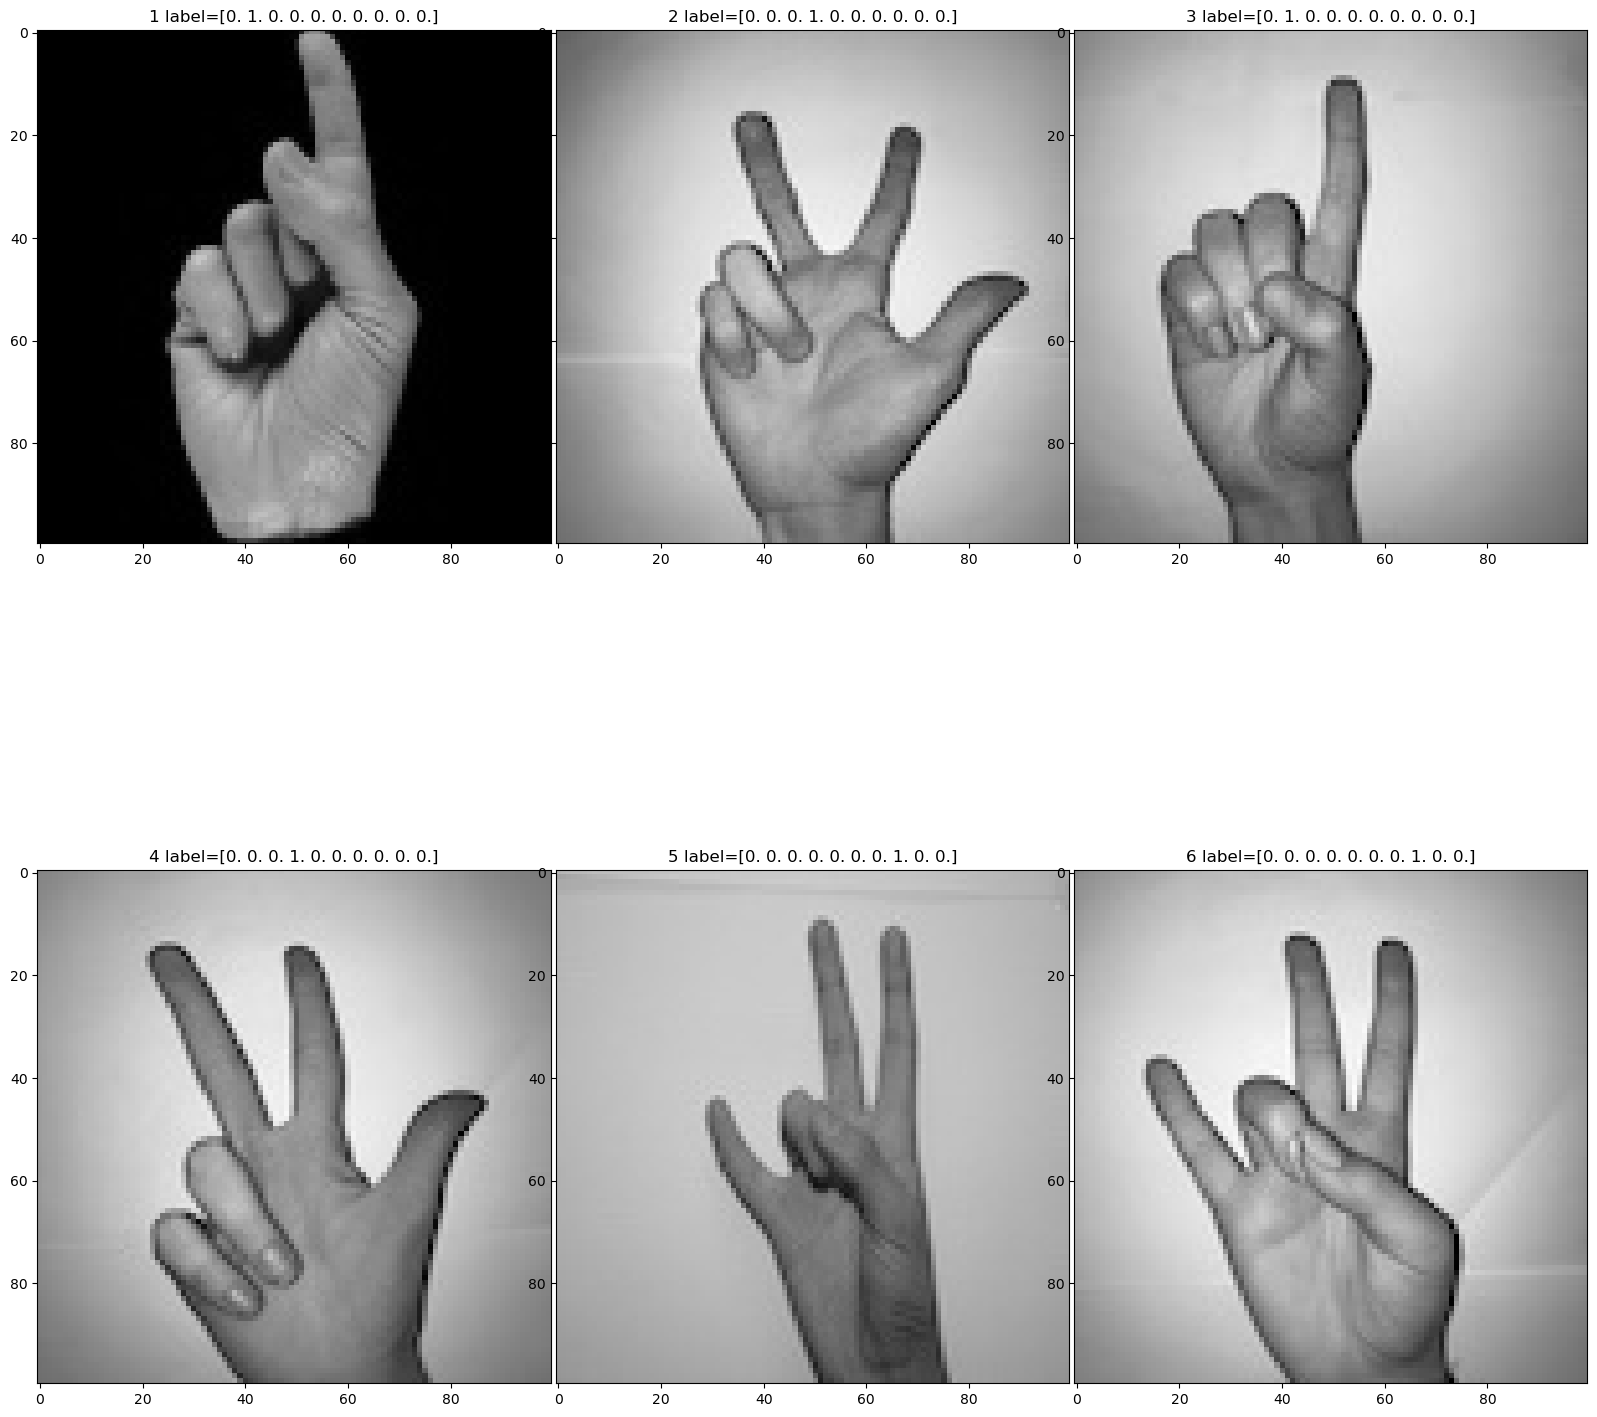

In [9]:
#test generators

import matplotlib.pyplot as plt

for data_batch, label_batch in train_generator:
    print('data batch shape', data_batch.shape)
    print('label batch shape', label_batch.shape)
    print('sample data shape', data_batch[1].shape)
    print('sample 20 labels', label_batch)
    break



fig=plt.figure(figsize=(20,20))
columns = 3
rows = 2
for i in range(1,7):
    img = data_batch[i]
    ax=fig.add_subplot(rows, columns, i)
    plt.subplots_adjust(hspace=None,wspace=0.01)
    ax.title.set_text(str(i)+" label=" + str(label_batch[i]))
    plt.imshow(img)
plt.show()

In [10]:
from keras import models, layers


from keras.applications import VGG16
vgg_base = VGG16(weights='imagenet', include_top=False,input_shape=(100,100,3))
network = models.Sequential()
network.add(vgg_base)
network.add(layers.Flatten())

network.add(layers.Dropout(0.5))

network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10,activation='sigmoid'))

network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dropout_1 (Dropout)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               2359808   
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 17,079,626
Trainable params: 17,079,626
Non-trainable params: 0
_________________________________________________________________


In [11]:
from keras import optimizers

network.compile(loss='categorical_crossentropy', optimizer= optimizers.Adam(learning_rate=1e-5), metrics=['acc'] )


hist = network.fit(train_generator, steps_per_epoch=97, epochs=30,
                   validation_data=val_generator, validation_steps=28)



Epoch 1/30
97/97 [==============================] - 4s 33ms/step - loss: 1.6069 - acc: 0.4417 - val_loss: 0.4247 - val_acc: 0.8814
Epoch 2/30
97/97 [==============================] - 3s 31ms/step - loss: 0.3516 - acc: 0.8917 - val_loss: 0.1083 - val_acc: 0.9599
Epoch 3/30
97/97 [==============================] - 3s 32ms/step - loss: 0.1380 - acc: 0.9513 - val_loss: 0.0628 - val_acc: 0.9726
Epoch 4/30
97/97 [==============================] - 3s 31ms/step - loss: 0.0747 - acc: 0.9808 - val_loss: 0.0551 - val_acc: 0.9818
Epoch 5/30
97/97 [==============================] - 3s 31ms/step - loss: 0.0528 - acc: 0.9829 - val_loss: 0.0604 - val_acc: 0.9708
Epoch 6/30
97/97 [==============================] - 3s 32ms/step - loss: 0.0374 - acc: 0.9922 - val_loss: 0.0360 - val_acc: 0.9891
Epoch 7/30
97/97 [==============================] - 3s 31ms/step - loss: 0.0258 - acc: 0.9943 - val_loss: 0.0390 - val_acc: 0.9854
Epoch 8/30
97/97 [==============================] - 3s 32ms/step - loss: 0.0186 - a

In [12]:
network.save('asl_network')

INFO:tensorflow:Assets written to: asl_network\assets


INFO:tensorflow:Assets written to: asl_network\assets


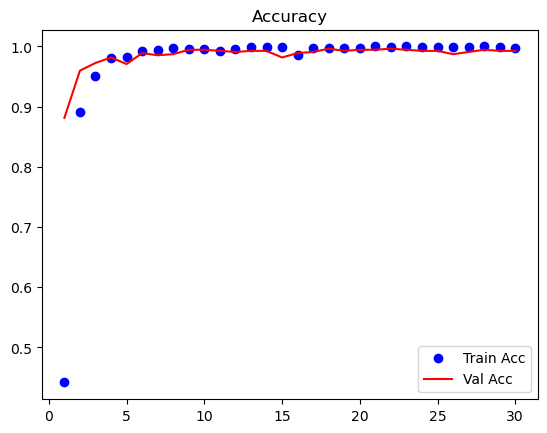

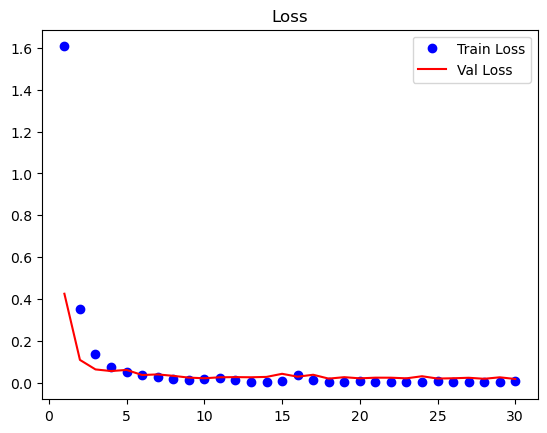

In [13]:
#plot results

import matplotlib.pyplot as plt
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo', label='Train Acc')
plt.plot(epochs,val_acc, 'r', label='Val Acc')
plt.title('Accuracy')
plt.legend()
plt.figure()


plt.plot(epochs,loss,'bo', label='Train Loss')
plt.plot(epochs,val_loss, 'r', label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()




In [14]:
res = network.evaluate(test_generator, steps=15, verbose=1)
print('Accuracy on test set: %.3f' % res[1])

15/15 [==============================] - 0s 20ms/step - loss: 0.0037 - acc: 1.0000
Accuracy on test set: 1.000
